<a href="https://colab.research.google.com/github/internship-kaard/zenteiq-kaard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a machine learning model that can predict student dropout rates or academic success based on a variety of factors, such as attendance, grades, and demographic data. The model should be able to identify students who are at risk of dropping out or falling behind and provide targeted interventions and support.**

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline
#from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [250]:
#data loading
df = pd.read_csv('dataset.csv')
#view the data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [ ]:
#finding null
df.isna().sum()

In [252]:
#finding duplicates
df.duplicated().sum()

0

In [253]:
#EDA - Exploratory Data Analysis
##dimension of the dataframe
df.shape

(4424, 37)

In [ ]:
##basic information of dataframe
df.info()

In [ ]:
##statistical summary
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

In [ ]:
##histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(50, 35), grid=True, legend=None);

In [ ]:
list(df)

In [ ]:
##finding unique values
for col in list(df):
  print(df[col].unique())

In [ ]:
df.describe(include='all').loc['unique', :]

In [260]:
df.loc[:,'Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [261]:
#df.astype('object').describe(include='all').loc['unique', :]

In [262]:
df['International'].unique()

array([0, 1])

In [263]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

In [329]:
# Creating a copy of the dataset
s_df=df.copy() 
enrolled_data = df[s_df["Target"]=="Enrolled"]
# Changing the Target to numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.replace("Dropout",1,inplace=True) 
s_df.replace("Graduate",0,inplace=True)
s_df.drop(s_df[s_df["Target"]=="Enrolled"].index,inplace=True)
s_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.67,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.00,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.50,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.00,0,9.4,-0.8,-3.12,0


In [265]:
s_df.loc[:,'Target'].value_counts()

0    2209
1    1421
Name: Target, dtype: int64

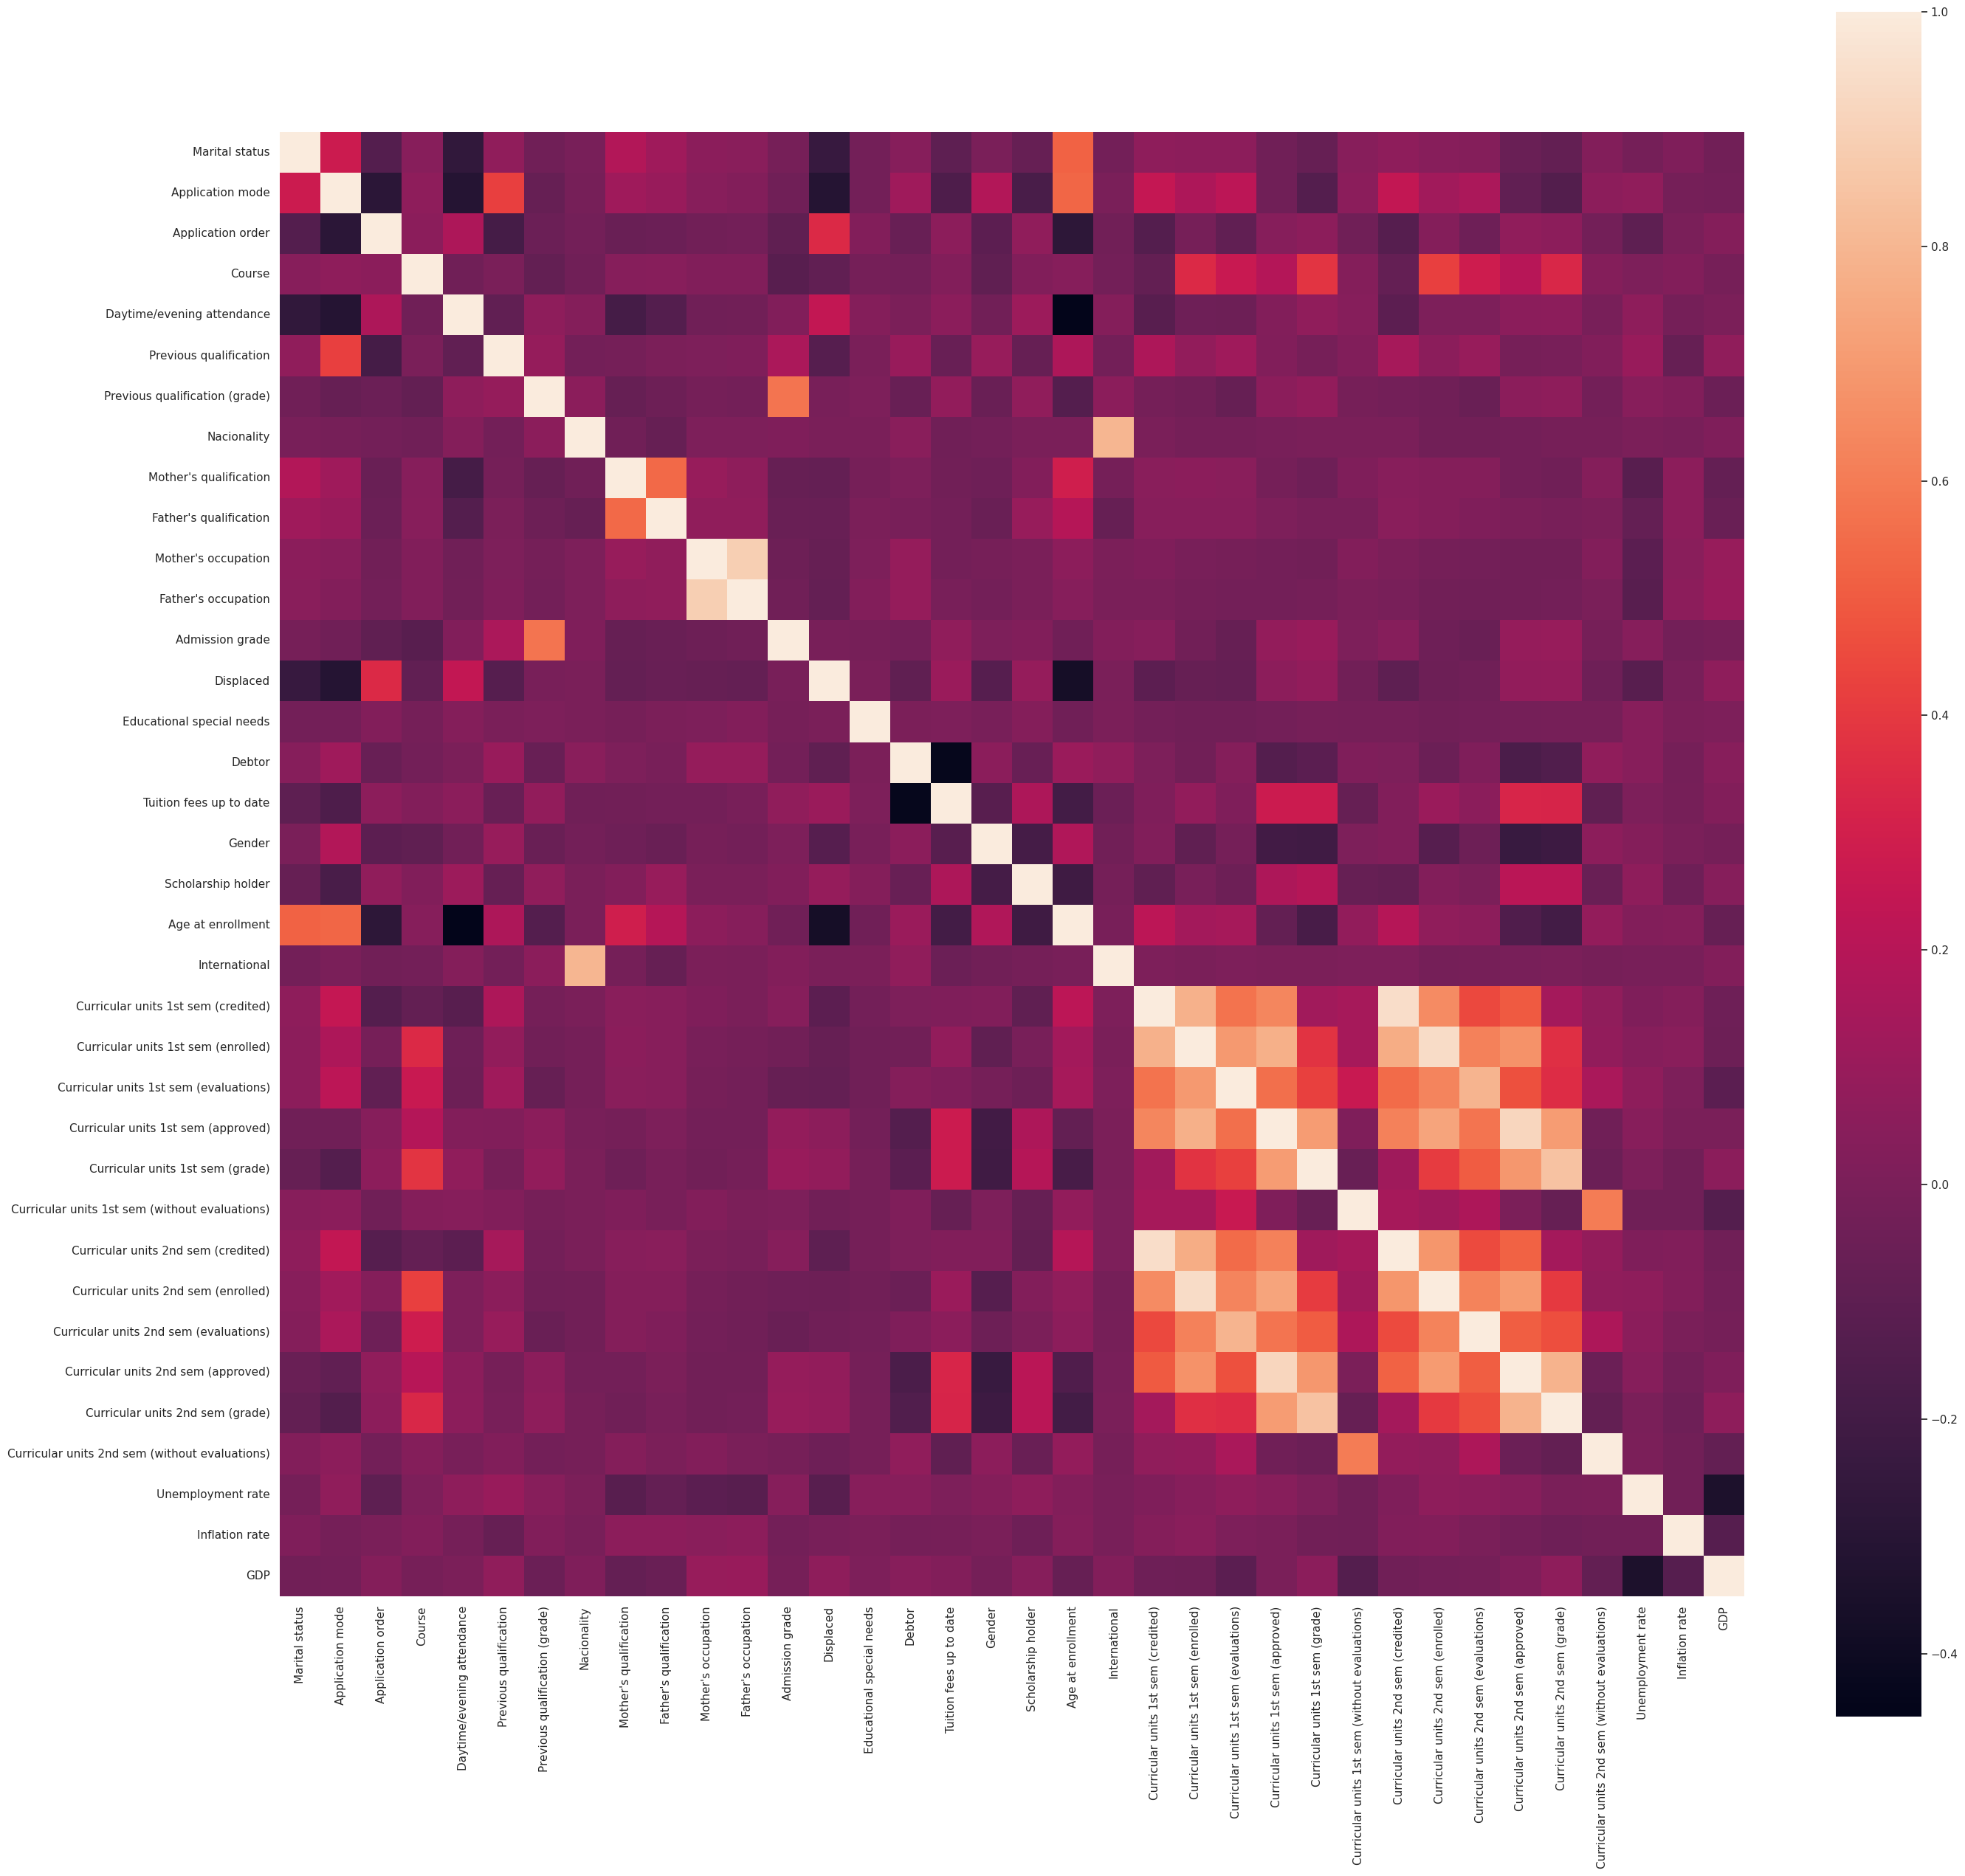

In [266]:
# finding correlations between attributes
# Computing the correlation matrix
corr = s_df.corr(numeric_only = True)

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(32, 30))

# Drawing the heatmap
sns.heatmap(corr, square=True)
plt.show()


In [267]:
s_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [268]:
s_df.loc[:,'Marital status'].value_counts()

1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital status, dtype: int64

In [269]:
s_df.loc[:,'Application mode'].value_counts()

1     1408
17     713
39     664
43     237
44     157
7      132
18     108
42      66
51      46
16      30
53      25
15      20
10      10
5        8
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64

In [270]:
s_df.loc[:,'Application order'].value_counts()

1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: Application order, dtype: int64

In [271]:
s_df.loc[:,'Course'].value_counts()

9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
171     178
9003    173
9853    142
9130    120
9119    106
9556     69
33        9
Name: Course, dtype: int64

In [272]:
s_df.loc[:,'Daytime/evening attendance'].value_counts()

1    3222
0     408
Name: Daytime/evening attendance, dtype: int64

In [273]:
s_df.loc[:,'Previous qualification'].value_counts()

1     3019
39     164
19     149
3      122
12      39
40      34
42      28
2       22
6       15
9       11
4        7
43       6
38       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

In [274]:
s_df.loc[:,'Previous qualification (grade)'].value_counts()

133.1    426
130.0    302
140.0    271
120.0    225
150.0    137
        ... 
117.4      1
190.0      1
188.0      1
166.0      1
126.6      1
Name: Previous qualification (grade), Length: 101, dtype: int64

In [275]:
s_df.loc[:,'Nacionality'].value_counts()

1      3544
41       32
22       12
26        9
6         8
24        5
11        3
103       3
101       2
100       2
2         2
25        1
62        1
13        1
109       1
21        1
14        1
17        1
105       1
Name: Nacionality, dtype: int64

In [276]:
s_df.loc[:,"Mother's qualification"].value_counts()

1     865
37    840
19    777
38    471
3     337
34    127
2      60
12     39
4      34
5      16
40      8
9       8
39      6
41      6
6       4
42      4
43      3
29      3
10      3
11      3
36      3
35      3
30      3
14      2
18      1
22      1
27      1
26      1
44      1
Name: Mother's qualification, dtype: int64

In [277]:
s_df.loc[:,"Father's qualification"].value_counts()

37    1010
19     785
1      732
38     575
3      220
34     109
2       43
12      34
4       32
5       15
39      13
11      10
36       8
9        5
40       5
14       4
22       4
29       3
30       3
10       2
43       2
26       2
35       2
6        2
33       1
27       1
44       1
25       1
20       1
42       1
18       1
13       1
41       1
31       1
Name: Father's qualification, dtype: int64

In [278]:
s_df.loc[:,'Admission grade'].value_counts()

130.0    125
120.0    121
140.0    117
100.0     93
150.0     67
        ... 
158.0      1
158.3      1
154.9      1
150.4      1
166.0      1
Name: Admission grade, Length: 602, dtype: int64

In [279]:
s_df.loc[:,'Displaced'].value_counts()

1    1993
0    1637
Name: Displaced, dtype: int64

In [280]:
s_df.loc[:,'Educational special needs'].value_counts()

0    3590
1      40
Name: Educational special needs, dtype: int64

In [281]:
s_df.loc[:,'Debtor'].value_counts()

0    3217
1     413
Name: Debtor, dtype: int64

In [282]:
s_df.loc[:,'Tuition fees up to date'].value_counts()

1    3144
0     486
Name: Tuition fees up to date, dtype: int64

In [283]:
s_df.loc[:,'Gender'].value_counts()

0    2381
1    1249
Name: Gender, dtype: int64

In [284]:
s_df.loc[:,'Scholarship holder'].value_counts()

0    2661
1     969
Name: Scholarship holder, dtype: int64

In [285]:
s_df.loc[:,'Age at enrollment'].value_counts()

18    864
19    754
20    459
21    252
22    137
24    101
23     84
27     79
26     75
25     72
28     68
29     61
32     56
34     48
31     48
35     44
30     43
37     37
33     37
39     33
36     32
41     26
38     25
43     22
44     19
40     19
45     18
47     16
50     14
49     12
46     12
42     11
48      8
51      7
53      6
54      6
55      5
52      4
59      3
17      3
58      3
57      2
60      2
61      1
70      1
62      1
Name: Age at enrollment, dtype: int64

In [286]:
s_df.loc[:,'International'].value_counts()

0    3544
1      86
Name: International, dtype: int64

In [287]:
s_df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

0     3150
2       71
1       67
3       57
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      14
14      14
13      12
12      11
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 1st sem (approved)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()

In [ ]:
s_df.loc[:,'Unemployment rate'].value_counts()

In [ ]:
s_df.loc[:,'Inflation rate'].value_counts()

In [ ]:
s_df.loc[:,'GDP'].value_counts()

In [324]:
#Standardization
x = s_df[['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']]
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
#scaled.shape

In [325]:
#labelencoding
lblencoder = LabelEncoder()
enc_df = s_df['Target']
enc_df = lblencoder.fit_transform(enc_df).reshape(-1,1)
#enc_df.shape